# Sequential Neural Network - TensorFlow - MNIST data set

Note: due to randomness, the values of the results may change within a small amount of tolerance, and consequently, the discussion of the results

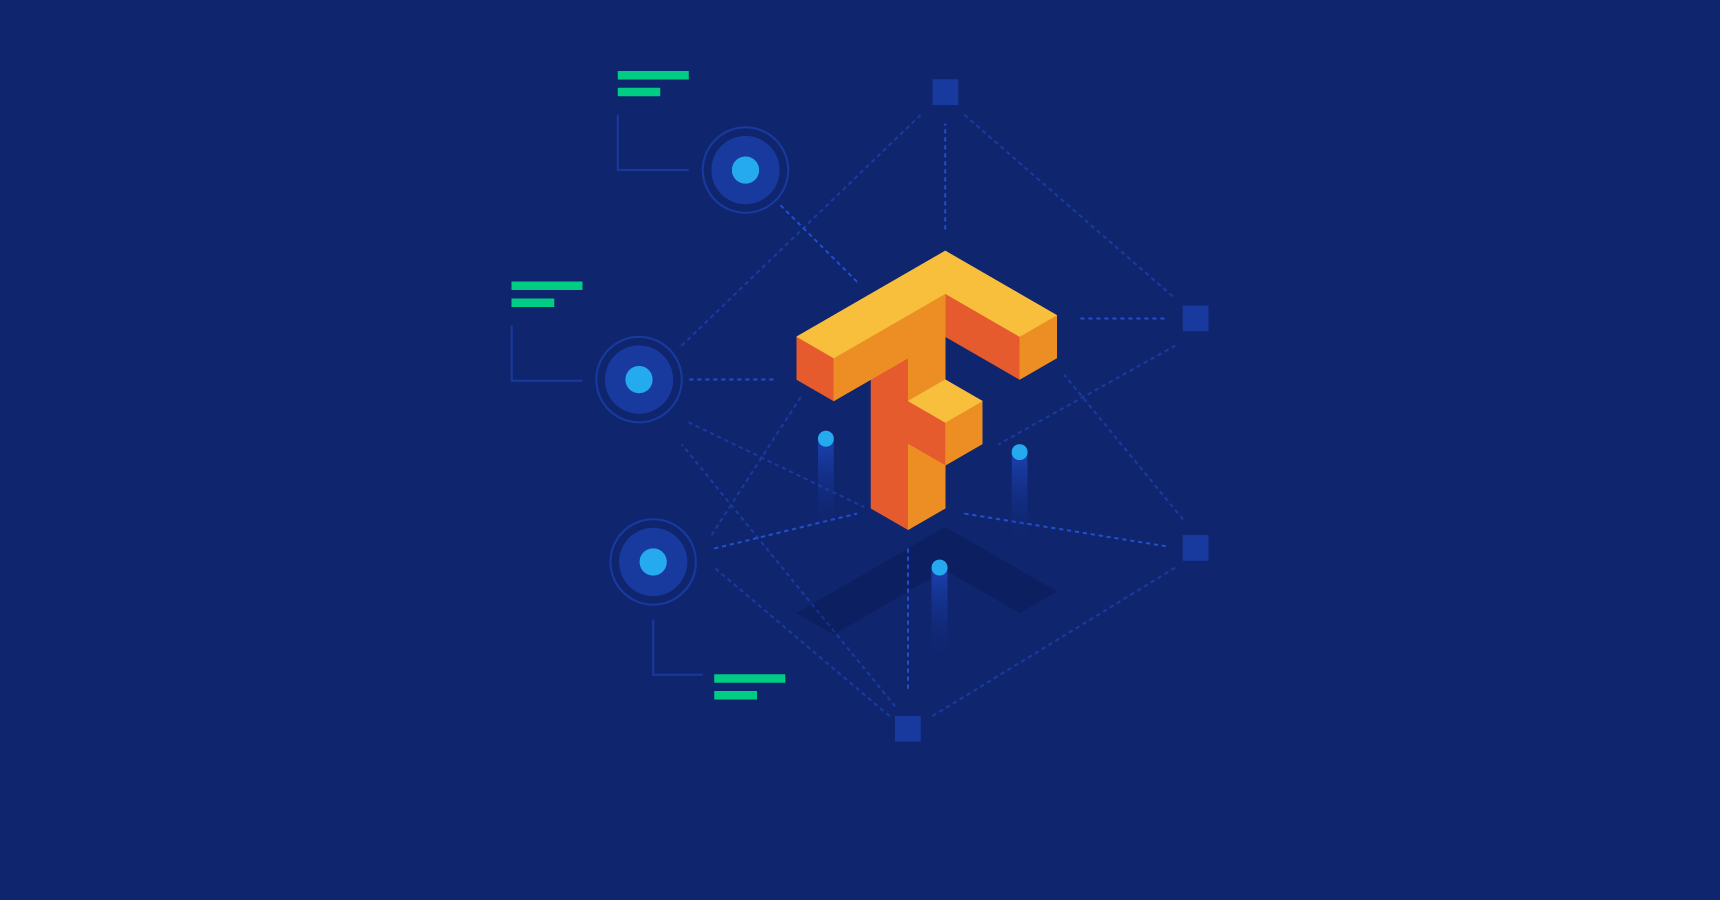

In [3]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import torch

In [4]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


## Exploring the data:

In [3]:
# show example of image
x_train[55]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         29, 130, 130, 225, 255, 255, 109,   7, 116, 243, 200,   6,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8,  95,
        217, 253, 253, 253, 253, 253, 253, 253, 253, 253, 248,  11,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  27, 213, 253,
        253, 240, 143, 111, 152, 253, 253, 253, 253, 194,  62,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  27, 213, 253, 215,
        105,  31,   0,   7, 153, 253, 253, 253, 244,  73,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 149, 253, 230,  34,
          0,   0,   0,  69, 253, 253, 253, 253,  79,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 149, 253, 221,  13,
          0,   0,  28, 156, 253, 253, 253, 176,  11,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  63, 236, 253, 175,
         14,   0, 186, 253, 253, 253, 196,  13,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  71, 253, 253,
        174,  50, 199, 253, 253, 237,  74,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  92, 234,
        253, 253, 253, 253, 237,  74,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  77,
        253, 253, 253, 236,  75,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 161,
        253, 253, 253, 151,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10, 101, 253,
        253, 237, 233, 158,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 131, 253, 253,
        173,  38, 186, 185,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 125, 237, 253, 114,
         14,   0, 186, 185,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  62, 238, 253, 176,  13,
          0,  21, 211, 185,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  11, 240, 253, 226,  11,   0,
          0, 165, 253, 136,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 126, 253, 243,  69,   0,   0,
         97, 246, 227,  36,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 136, 253, 178, 112, 112, 194,
        248, 253,  76,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [4]:
# number of images
print(f'train images:{len(x_train)} and their class is also {len(y_train)} ')

train images:60000 and their class is also 60000 


In [5]:
print(f'test images:{len(x_test)} and their class is also {len(y_test)}')

test images:10000 and their class is also 10000


(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

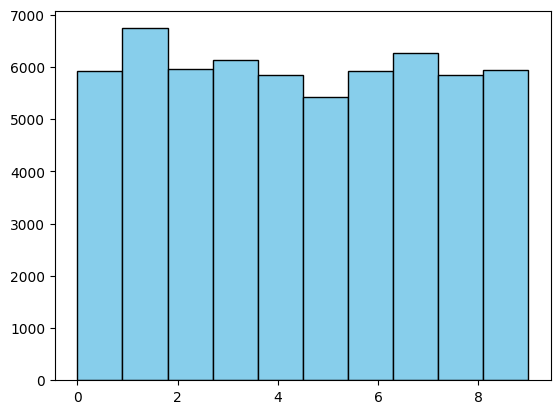

In [6]:
# data distrebution
class_distribution = pd.Series(y_train).value_counts().sort_index()
# Plotting a basic histogram
plt.hist(pd.Series(y_train), bins=10, color='skyblue', edgecolor='black')

## The data is generally balance but with slitly high appearance for class 1 and low appearance for class 5

## Analysis of the data content: lets try to understand information form the raw data

In [7]:
# Threshold for white pixels
white_value = 200 / 255
image_w = 28
image_h = 28

# Lists to collect results
results = []
white_pixel_stats = {}

for i in range(10):
    # Select images of the current class
    ls_images = x_train[y_train == i]

    # Initialize list to store white pixel counts
    white_pixels_counts = []

    # Initialize a mask with True values (assume all pixels are non-white initially)
    common_non_white_mask = np.ones((image_w, image_h), dtype=bool)

    # Process each image in the current class
    for image in ls_images:
        # Count the number of white pixels in the image
        white_pixels_count = np.sum(image >= white_value)
        white_pixels_counts.append(white_pixels_count)

        # Update the mask with the current image's non-white pixel mask
        common_non_white_mask &= (image < white_value)

    # Convert white pixel counts to numpy array for statistical calculations
    white_pixels_counts = np.array(white_pixels_counts)
    average_white_pixels = np.mean(white_pixels_counts)
    std_dev_white_pixels = np.std(white_pixels_counts)

    # Calculate the average percentage of white and non-white pixels
    avg_percent_white_pixels = average_white_pixels / (image_w * image_h) * 100
    avg_percent_non_white_pixels = 100 - avg_percent_white_pixels

    # Count the number of common non-white pixels
    common_non_white_pixels_count = np.sum(common_non_white_mask)

    # Store results
    results.append({
        "class": i,
        "average_white_pixels": average_white_pixels,
        "std_dev_white_pixels": std_dev_white_pixels,
        "avg_percent_white_pixels": avg_percent_white_pixels,
        "avg_percent_non_white_pixels": avg_percent_non_white_pixels,
        "common_non_white_pixels_count": common_non_white_pixels_count,
        "percent_common_non_white_pixels": common_non_white_pixels_count / (image_w * image_h) * 100
          })
    white_pixel_stats[i] = (average_white_pixels, std_dev_white_pixels )

# Print all results at the end
for result in results:
    print("white pixels Class:", result["class"])
    print("Average white pixels:", result["average_white_pixels"])
    print("Standard deviation:", result["std_dev_white_pixels"])
    print("AVG % of white pixel:", result["avg_percent_white_pixels"])
    print("AVG % of non-white pixel:", result["avg_percent_non_white_pixels"])
    print("Number of common non-white pixels:", result["common_non_white_pixels_count"])
    print("Percentage of common non-white pixels:", result["percent_common_non_white_pixels"])
    print("\n")

white pixels Class: 0
Average white pixels: 191.97484382914064
Standard deviation: 33.70765770614848
AVG % of white pixel: 24.48658722310467
AVG % of non-white pixel: 75.51341277689534
Number of common non-white pixels: 219
Percentage of common non-white pixels: 27.933673469387756


white pixels Class: 1
Average white pixels: 85.84603975081578
Standard deviation: 19.97235626366689
AVG % of white pixel: 10.949749968216297
AVG % of non-white pixel: 89.0502500317837
Number of common non-white pixels: 201
Percentage of common non-white pixels: 25.637755102040817


white pixels Class: 2
Average white pixels: 168.8091641490433
Standard deviation: 32.944178579156656
AVG % of white pixel: 21.531781141459604
AVG % of non-white pixel: 78.4682188585404
Number of common non-white pixels: 173
Percentage of common non-white pixels: 22.066326530612244


white pixels Class: 3
Average white pixels: 163.33664981242865
Standard deviation: 33.65119699222428
AVG % of white pixel: 20.833756353626104
AVG % o

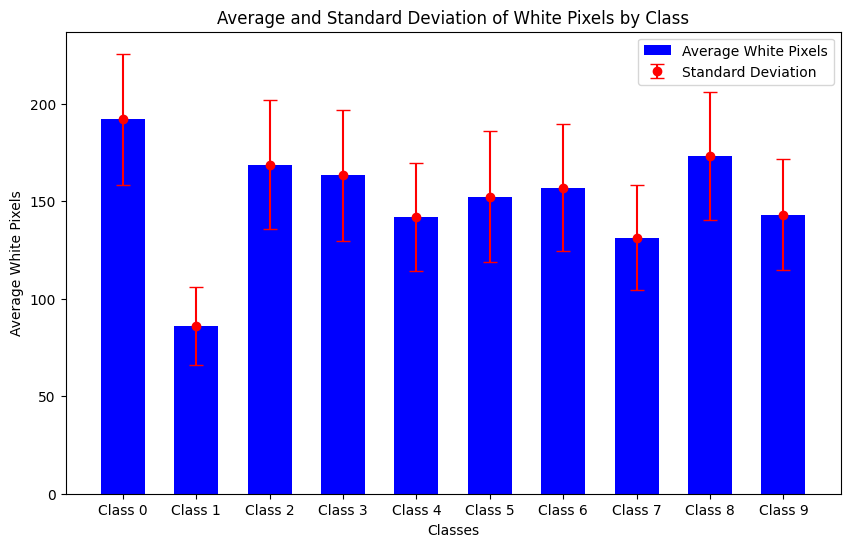

In [8]:
classes = [f'Class {x}' for x in white_pixel_stats]
averages = [white_pixel_stats[x][0] for x in white_pixel_stats]
std_devs = [white_pixel_stats[x][1] for x in white_pixel_stats]

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.6
bars = plt.bar(classes, averages, color='blue', width=bar_width, label='Average White Pixels') # Create bars with the averages
# Error bars indicating standard deviation

plt.errorbar(classes, averages, yerr=std_devs, fmt='o', color='red', capsize=5, label='Standard Deviation')
plt.xlabel('Classes')
plt.ylabel('Average White Pixels')
plt.title('Average and Standard Deviation of White Pixels by Class')
plt.legend()
plt.show()

## From the above histogram, we can clearly understand that number '1' has a unique average number of white pixels, probably because this number is generally built with one line component compared to other numbers.

Example of number 8, color histogram 



(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [25.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,  0.],
        [22.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  5.],
        [17.,  1.,  1.,  0.,  1.,  2.,  1.,  0.,  0.,  5.],
        [14.,  1.,  2.,  0.,  1.,  1.,  0.,  0.,  2.,  7.],
        [14.,  0.,  0.,  2.,  1.,  0.,  1.,  0.,  2.,  8.],
        [13.,  1.,  0.,  2.,  1.,  1.,  2.,  1.,  1.,  6.],
        [14.,  2.,  0.,  1.,  1.,  0.,  2.,  0.,  1.,  7.],
        [14.,  3.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  8.],
        [12.,  1.,  1.,  0.,  0.,  2.,  0.,  4.,  2.,  6.],
        [12.,  1.,  1.,  0.,  1.,  2.,  

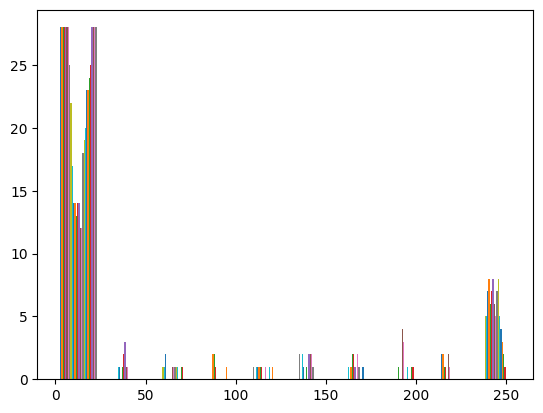

In [9]:
 # Example of image number 55, color histogram
print(f'Example of number {y_train[55]}, color histogram \n')
plt.hist(x_train[55])

In [10]:
# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Normalize pixel values to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a simple neural network model
def get_model_nn():
    model_nn = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
        tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
        tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
        tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
        tf.keras.layers.Dense(10)  # Output layer with 10 units (one for each digit class)
    ])

    # Compile the model
    model_nn.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model_nn

model_nn = get_model_nn()

TensorFlow version: 2.15.0


In [11]:
# Train the model
model_nn_history = model_nn.fit(x_train, y_train, epochs=15,
                          validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 32s 15ms/step - loss: 0.2569 - accuracy: 0.9234 - val_loss: 0.1347 - val_accuracy: 0.9585
Epoch 2/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1106 - accuracy: 0.9666 - val_loss: 0.0933 - val_accuracy: 0.9706
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0796 - accuracy: 0.9753 - val_loss: 0.0989 - val_accuracy: 0.9694
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0609 - accuracy: 0.9809 - val_loss: 0.0733 - val_accuracy: 0.9793
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0511 - accuracy: 0.9833 - val_loss: 0.0733 - val_accuracy: 0.9774
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0410 - accuracy: 0.9868 - val_loss: 0.0787 - val_accuracy: 0.9790
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0348 - accuracy: 0.9886 - val_loss: 0.0737 - val_ac

313/313 - 1s - loss: 0.1034 - accuracy: 0.9801 - 630ms/epoch - 2ms/step

Test Loss: 0.10338424146175385

Test accuracy: 0.9800999760627747
313/313 [==============================] - 1s 4ms/step
Classification report: {'0': {'precision': 0.9838056680161943, 'recall': 0.9918367346938776, 'f1-score': 0.9878048780487805, 'support': 980}, '1': {'precision': 0.9894736842105263, 'recall': 0.9938325991189427, 'f1-score': 0.9916483516483516, 'support': 1135}, '2': {'precision': 0.9796708615682478, 'recall': 0.9806201550387597, 'f1-score': 0.9801452784503631, 'support': 1032}, '3': {'precision': 0.9642857142857143, 'recall': 0.9891089108910891, 'f1-score': 0.9765395894428152, 'support': 1010}, '4': {'precision': 0.9768145161290323, 'recall': 0.9867617107942973, 'f1-score': 0.9817629179331305, 'support': 982}, '5': {'precision': 0.9873853211009175, 'recall': 0.9652466367713004, 'f1-score': 0.9761904761904763, 'support': 892}, '6': {'precision': 0.9935965848452508, 'recall': 0.9718162839248434, 'f

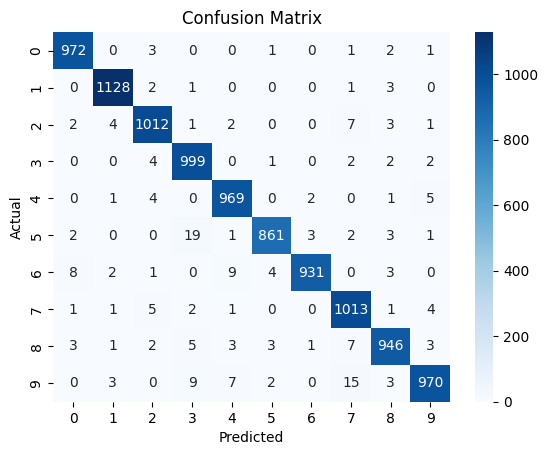

In [12]:
# Evaluate the model on test data
from sklearn.metrics import classification_report, confusion_matrix

def model_Evaluation(model,x_test, y_test):
    model_results = model.evaluate(x_test, y_test, verbose=2)
    print("\nTest Loss:", model_results[0])
    print("\nTest accuracy:", model_results[1])

    # Additional metrics
    y_pred = model.predict(x_test).argmax(axis=1)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(f'Classification report: {report}')

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

model_Evaluation(model=model_nn ,x_test=x_test, y_test=y_test)

## The overall preformance are good with Accuracy is 0.98. we can see that Class 5 has notable misclassifications as class 3. Class 9 is often confused with class 7.


<ipython-input-13-a329d67caf9c>:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, train_loss, 'b-',marker='o',linestyle='-', label='Training Loss')
<ipython-input-13-a329d67caf9c>:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r-',marker='o',linestyle='-', label='Validation Loss')


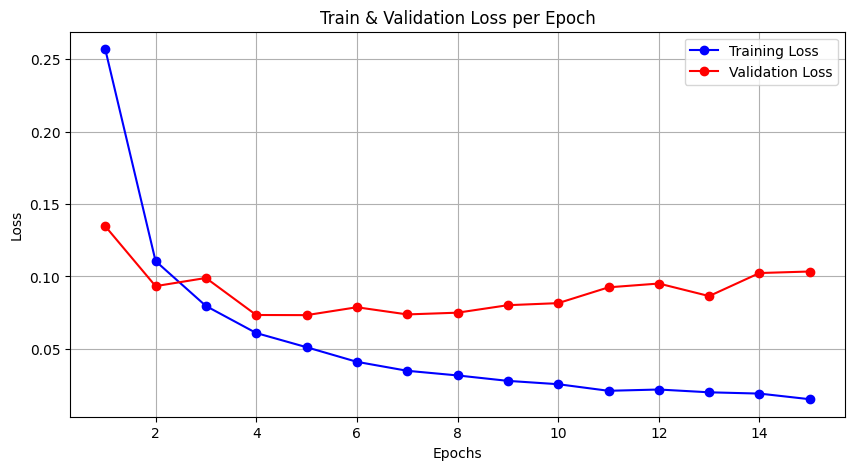


Optimal number of epochs: 5


In [13]:
def show_model_loss(model_history):
    train_loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    epochs = range(1, len(train_loss) + 1)

    # Plotting both the training loss and the validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, 'b-',marker='o',linestyle='-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-',marker='o',linestyle='-', label='Validation Loss')
    plt.title('Train & Validation Loss per Epoch')  # Title of the plot
    plt.xlabel('Epochs')  # X-axis label
    plt.ylabel('Loss')  # Y-axis label
    plt.legend()
    plt.grid(True)  # Adds a grid
    plt.show()

    # Best model recomandation
    optimal_epochs = val_loss.index(min(val_loss)) + 1
    print("\nOptimal number of epochs:", optimal_epochs)
show_model_loss(model_nn_history)


## Applying a 'blur' effect to the images by averaging all pixel's surroundings.
## To implement it I will use a convolution operation with a kernel size 3x3
## where his function will average the center pixel with his surroundings.


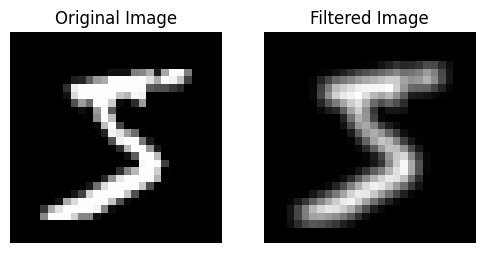

In [8]:
## Implementing "blur" the image by averaging all pixels surroundings

from scipy.signal import correlate2d

def apply_mean_filter(image, kernel_size=3):
    """
    Applies a mean filter to an image.
    :param image: 2D array of the image (one channel).
    :param kernel_size: Size of the square kernel, default is 3x3.
    :return: Filtered image.
    """
    # Create a kernel of shape (kernel_size, kernel_size) where each element is 1/(kernel_size*kernel_size)
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)

    # Apply the mean filter using 2D correlation
    # 'boundary=fill' extends the image borders by filling with zeros.
    # 'fillvalue=0' specifies the fill value to be zeros.
    filtered_image = correlate2d(image, kernel, mode='same', boundary='fill', fillvalue=0)

    return filtered_image

x_train_filtered = np.array([apply_mean_filter(img) for img in x_train])
x_test_filtered = np.array([apply_mean_filter(img) for img in x_test])

def plot_images(original, filtered, index):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(original[index], cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered[index], cmap='gray')
    plt.title('Filtered Image')
    plt.axis('off')

    plt.show()

# Example: plot the first image in the dataset
plot_images(x_train, x_train_filtered, 0)

In [15]:
x_train_filtered[0].shape

(28, 28)

In [16]:
# Train new model with filtered data
model_nn_filter = get_model_nn()
filtered_model_history = model_nn_filter.fit(x_train_filtered, y_train, epochs=15,
                          validation_data=(x_test_filtered, y_test))

Epoch 1/15
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2663 - accuracy: 0.9213 - val_loss: 0.1325 - val_accuracy: 0.9579
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1261 - accuracy: 0.9618 - val_loss: 0.1057 - val_accuracy: 0.9655
Epoch 3/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0957 - accuracy: 0.9700 - val_loss: 0.0915 - val_accuracy: 0.9719
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0819 - accuracy: 0.9747 - val_loss: 0.0964 - val_accuracy: 0.9710
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0693 - accuracy: 0.9783 - val_loss: 0.0857 - val_accuracy: 0.9735
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0623 - accuracy: 0.9798 - val_loss: 0.0754 - val_accuracy: 0.9773
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0568 - accuracy: 0.9818 - val_loss: 0.0720 - val_ac

313/313 - 1s - loss: 0.0774 - accuracy: 0.9816 - 625ms/epoch - 2ms/step

Test Loss: 0.07743718475103378

Test accuracy: 0.9815999865531921
313/313 [==============================] - 1s 2ms/step
Classification report: {'0': {'precision': 0.9858299595141701, 'recall': 0.9938775510204082, 'f1-score': 0.9898373983739838, 'support': 980}, '1': {'precision': 0.9920564872021183, 'recall': 0.9903083700440528, 'f1-score': 0.9911816578483246, 'support': 1135}, '2': {'precision': 0.9759384023099134, 'recall': 0.9825581395348837, 'f1-score': 0.9792370835345243, 'support': 1032}, '3': {'precision': 0.9782823297137216, 'recall': 0.9811881188118812, 'f1-score': 0.9797330696984676, 'support': 1010}, '4': {'precision': 0.9906152241918665, 'recall': 0.9674134419551935, 'f1-score': 0.9788768675940237, 'support': 982}, '5': {'precision': 0.9841269841269841, 'recall': 0.9730941704035875, 'f1-score': 0.9785794813979707, 'support': 892}, '6': {'precision': 0.9894957983193278, 'recall': 0.9832985386221295, 'f

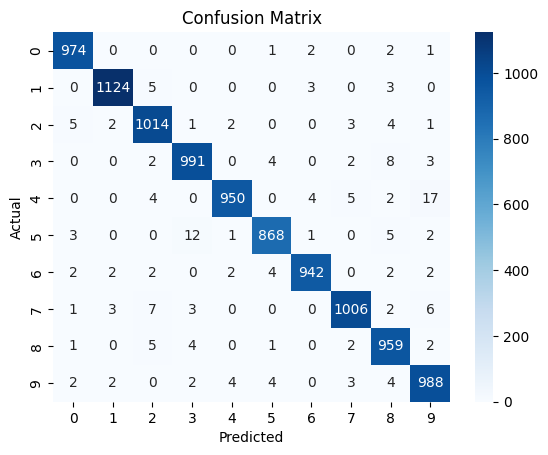

In [17]:
# Evaluating filtered images model
model_Evaluation(model=model_nn_filter ,x_test=x_test_filtered, y_test=y_test)

## We can see that the model Accuracy raised a bit to 0.98 - model is worse now with a minor change comparing to the "un-filtered image" of the previous model. Also have missclasifications problem with the numbers 9 - 4, and 5 - 3.

<ipython-input-13-a329d67caf9c>:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, train_loss, 'b-',marker='o',linestyle='-', label='Training Loss')
<ipython-input-13-a329d67caf9c>:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r-',marker='o',linestyle='-', label='Validation Loss')


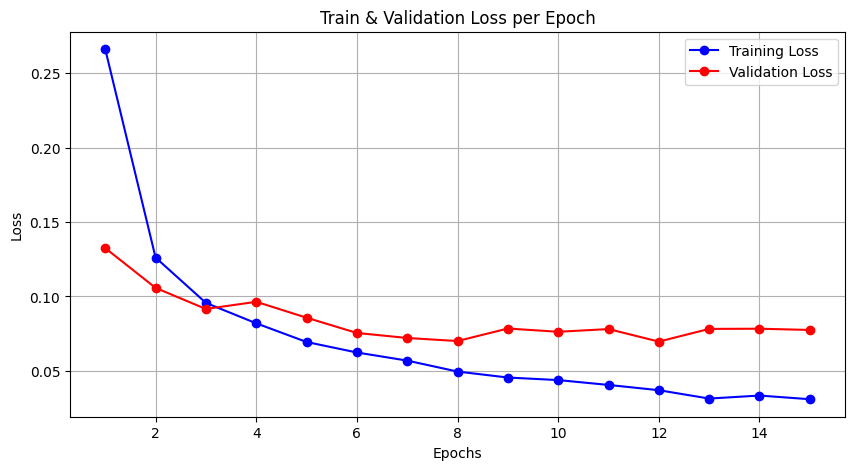


Optimal number of epochs: 12


In [18]:
# Filter model loss
show_model_loss(filtered_model_history)


## PCA - Principal Component Analysis, dimensionality reduction method

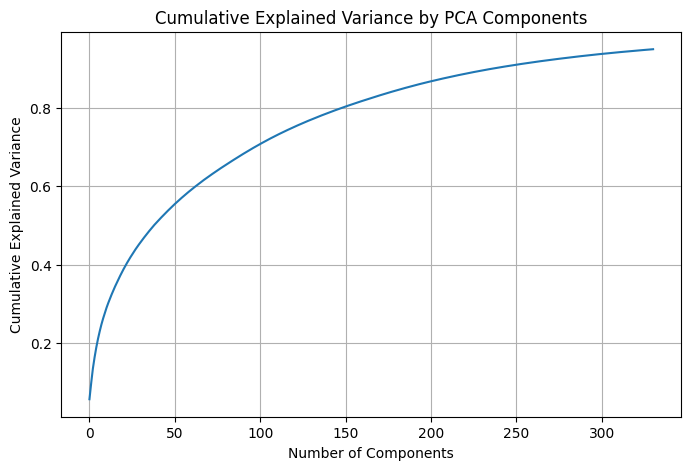

Total variance explained by all chosen components: 0.9502951572319147 



In [19]:
# Apply PCA dimantion reduction

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_PCA(train_to_pca, test_to_pca):

    x_train_flat = train_to_pca.reshape(train_to_pca.shape[0], -1)  # Reshape from (60000, 28, 28) to (60000, 784)
    x_test_flat = test_to_pca.reshape(test_to_pca.shape[0], -1)
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train_flat)
    x_test_scaled = scaler.transform(x_test_flat)
    pca = PCA(n_components=0.95)  # Keeps 95% of variance
    train_pca = pca.fit_transform(x_train_scaled) # Fit on training data only
    test_pca = pca.transform(x_test_scaled) # Apply the mapping (transform) to both the training set and the test set.

    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.figure(figsize=(8, 5))
    plt.plot(cumulative_variance)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance by PCA Components')
    plt.grid(True)
    plt.show()

    # print("\nExplained variance ratio: \n", pca.explained_variance_ratio_, '\n')
    print("Total variance explained by all chosen components:", sum(pca.explained_variance_ratio_), '\n')


    return train_pca, test_pca

x_train_pca, x_test_pca = apply_PCA(train_to_pca = x_train, test_to_pca = x_test )
#x_train_pca = np.array(x_train_pca)
#x_test_pca = np.array(x_test_pca)

In [20]:
# Checking train test shape
print("Shape of PCA-transformed training data:", x_train_pca.shape)
print("Shape of PCA-transformed testing data:", x_test_pca.shape)

Shape of PCA-transformed training data: (60000, 331)
Shape of PCA-transformed testing data: (10000, 331)


Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3339 - accuracy: 0.9075 - val_loss: 0.1929 - val_accuracy: 0.9534
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1496 - accuracy: 0.9585 - val_loss: 0.1359 - val_accuracy: 0.9660
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1137 - accuracy: 0.9696 - val_loss: 0.1409 - val_accuracy: 0.9687
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0889 - accuracy: 0.9754 - val_loss: 0.1227 - val_accuracy: 0.9705
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0723 - accuracy: 0.9787 - val_loss: 0.1197 - val_accuracy: 0.9704
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0608 - accuracy: 0.9813 - val_loss: 0.1345 - val_accuracy: 0.9719
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0527 - accuracy: 0.9845 - val_loss: 0.1331 - val_accura

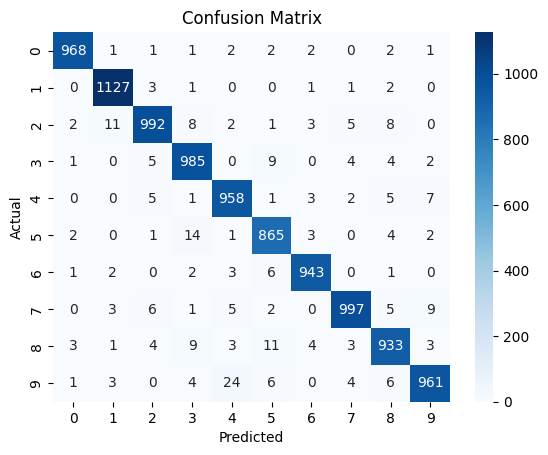

<ipython-input-13-a329d67caf9c>:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, train_loss, 'b-',marker='o',linestyle='-', label='Training Loss')
<ipython-input-13-a329d67caf9c>:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r-',marker='o',linestyle='-', label='Validation Loss')


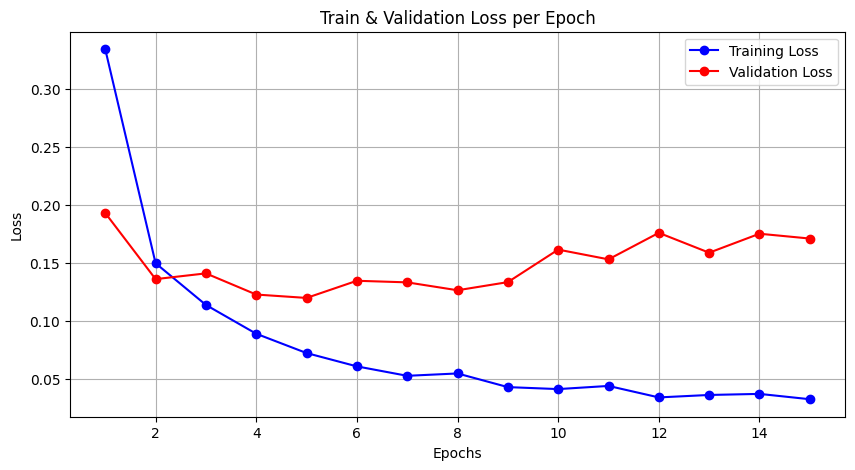


Optimal number of epochs: 5


In [21]:
# Train new models with PCA and modify model Architecture
model_nn_pca = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(x_train_pca.shape[1],)),  # Flatten to PCA dimantion
        tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
        tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
        tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
        tf.keras.layers.Dense(10)  # Output layer with 10 units (one for each digit class)
        ])

# Compile the model
model_nn_pca.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_nn_pca_history = model_nn_pca.fit(x_train_pca, y_train, epochs=15,
                          validation_data=(x_test_pca, y_test))
model_Evaluation(model=model_nn_pca ,x_test=x_test_pca, y_test=y_test)
show_model_loss(model_nn_pca_history)

### The model accuracy has dropped to 0.97 with PCA features on the data. Also, the phenomena with numbers 4 and 9 still occur, but this misdetection is even better. PCA transforms the data into 1 dimension with 331 features into the sequential network. We can see that PCA helps the model with noise reduction, improved training stability, and faster convergence, as it is easier to understand the optimal epoch from the loss function graph.

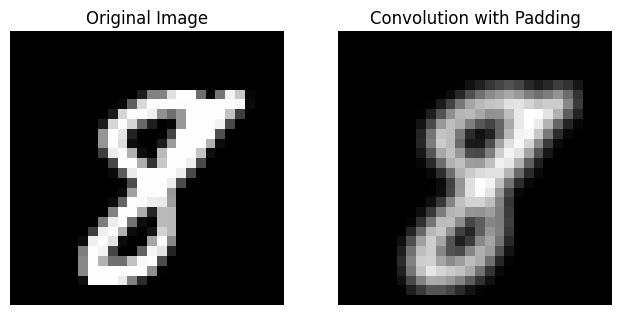

Conv shape:  (28, 28)


In [22]:
# Convulotion - dimension reduction by replacing each non-overlapping 3x3 pixel block with its average value
from scipy.signal import correlate2d

def apply_convolution(image, kernel, add_padding=False):
    """
    Apply a 2D convolution to an image using a specified kernel, with an option to add padding.

    Args:
    image (numpy.ndarray): The input image array.
    kernel (numpy.ndarray): The convolution kernel.
    add_padding (bool): If True, adds padding to the image to preserve the original size.

    Returns:
    numpy.ndarray: The convolved image.
    """
    if add_padding: # Calculate the required padding size for each dimension
        pad_height = kernel.shape[0] // 2
        pad_width = kernel.shape[1] // 2

        image_padded = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    else:
        image_padded = image

    result = correlate2d(image_padded, kernel, mode='same', boundary='fill', fillvalue=0)

    if add_padding:
        # Remove the padding to restore the original image size
        result = result[pad_height:-pad_height, pad_width:-pad_width]

    return result

# set Kernel
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9

# Apply convolution with padding
x_train_conv = [apply_convolution(img, kernel, add_padding=True) for img in x_train]
x_train_conv = np.array(x_train_conv)
x_test_conv = [apply_convolution(img, kernel, add_padding=True) for img in x_test]
x_test_conv = np.array(x_test_conv)


def plot_images(original, conv_with_padding):
    plt.figure(figsize=(12, 4))
    titles = ['Original Image', 'Convolution with Padding']
    images = [original, conv_with_padding]
    for i, img in enumerate(images):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Plot the images
plot_images(x_train[55], x_train_conv[55])
print("Conv shape: ",x_test_conv[55].shape)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2636 - accuracy: 0.9234 - val_loss: 0.1196 - val_accuracy: 0.9630
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1237 - accuracy: 0.9618 - val_loss: 0.0843 - val_accuracy: 0.9739
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0941 - accuracy: 0.9710 - val_loss: 0.0864 - val_accuracy: 0.9723
Epoch 4/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0794 - accuracy: 0.9747 - val_loss: 0.0745 - val_accuracy: 0.9773
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0684 - accuracy: 0.9787 - val_loss: 0.0729 - val_accuracy: 0.9784
Epoch 6/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0604 - accuracy: 0.9809 - val_loss: 0.0719 - val_accuracy: 0.9792
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0537 - accuracy: 0.9824 - val_loss: 0.0698 - val_ac

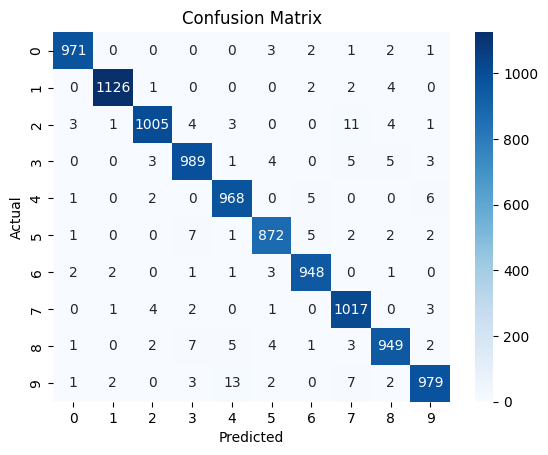

<ipython-input-13-a329d67caf9c>:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, train_loss, 'b-',marker='o',linestyle='-', label='Training Loss')
<ipython-input-13-a329d67caf9c>:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r-',marker='o',linestyle='-', label='Validation Loss')


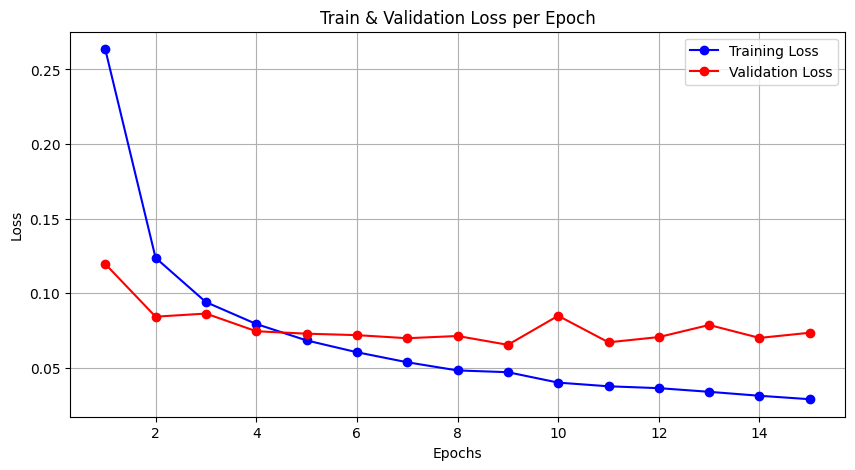


Optimal number of epochs: 9


In [23]:
# Train new models with Convolutions
model_nn_conv = get_model_nn()
model_nn_conv_history = model_nn_conv.fit(x_train_conv, y_train, epochs=15,
                          validation_data=(x_test_conv, y_test))
model_Evaluation(model=model_nn_conv ,x_test=x_test_conv, y_test=y_test)
show_model_loss(model_nn_conv_history)

### Now we got better results with a higher accuracy of 0.982. The problem with the '4' and '9' numbers is better now; it looks like predicting the number '4' is solved and distinguished. However, the phenomenon in the other direction, where predicting '9' is still confused with the number '4', persists with its misclassification. Also, we can see that the optimal epoch is number 9, as it has the least error from the loss function, but it is hard to distinguish between its nearby epochs as the loss values look pretty stable.

In [5]:
# New Data - Undersampled classes 3, and 5

x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
data = pd.DataFrame(x_train_reshaped)
data['label'] = y_train

undersample_ratio = 0.5 #undersampling ratio

class_3_indices = data[data['label'] == 3].index
class_5_indices = data[data['label'] == 5].index

# Randomly select a subset
class_3_indices_to_keep = np.random.choice(class_3_indices, int(len(class_3_indices) * undersample_ratio), replace=False)
class_5_indices_to_keep = np.random.choice(class_5_indices, int(len(class_5_indices) * undersample_ratio), replace=False)
other_indices = data[~data['label'].isin([3, 5])].index

indices_to_keep = np.concatenate([class_3_indices_to_keep, class_5_indices_to_keep, other_indices])
new_data = data.loc[indices_to_keep]
undersample_x_train = new_data.drop(columns=['label']).values
undersample_y_train = new_data['label'].values
undersample_x_train = undersample_x_train.reshape(undersample_x_train.shape[0], 28, 28)

print(undersample_x_train.shape)
print(undersample_y_train.shape)

(54223, 28, 28)
(54223,)


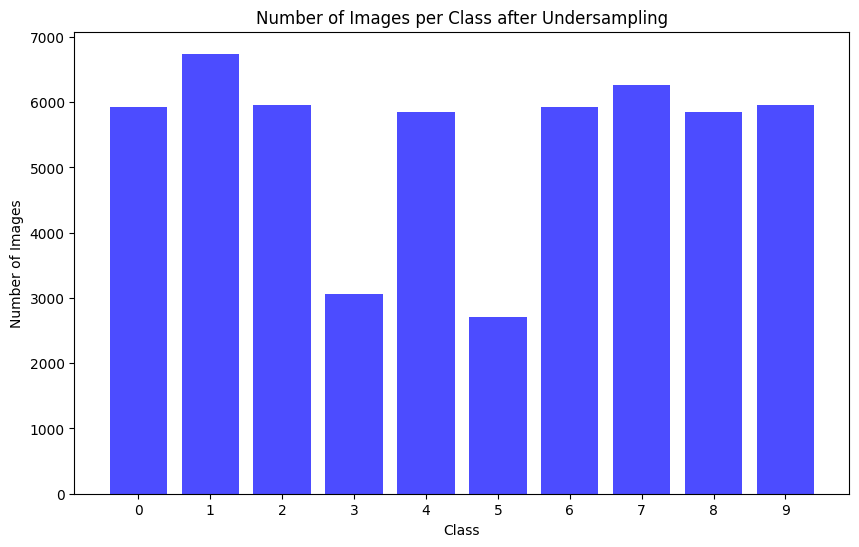

In [11]:
# plot the 50% undersampling
def plot_hist_num_of_classes(y_data_to_plot, operation):
    class_counts = np.bincount(y_data_to_plot)
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(class_counts)), class_counts, color='blue', alpha=0.7)
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Class after '+ operation)
    plt.xticks(range(len(class_counts)))
    plt.show()

plot_hist_num_of_classes(y_data_to_plot = undersample_y_train, operation='Undersampling')

## This plot represent the reduction of classes '3' and '5' by the undersampling operation

Epoch 1/15
1695/1695 [==============================] - 13s 7ms/step - loss: 0.2554 - accuracy: 0.9225 - val_loss: 0.1444 - val_accuracy: 0.9542
Epoch 2/15
1695/1695 [==============================] - 10s 6ms/step - loss: 0.1112 - accuracy: 0.9670 - val_loss: 0.1004 - val_accuracy: 0.9703
Epoch 3/15
1695/1695 [==============================] - 12s 7ms/step - loss: 0.0793 - accuracy: 0.9752 - val_loss: 0.0942 - val_accuracy: 0.9713
Epoch 4/15
1695/1695 [==============================] - 11s 7ms/step - loss: 0.0595 - accuracy: 0.9813 - val_loss: 0.0779 - val_accuracy: 0.9755
Epoch 5/15
1695/1695 [==============================] - 10s 6ms/step - loss: 0.0505 - accuracy: 0.9839 - val_loss: 0.1038 - val_accuracy: 0.9706
Epoch 6/15
1695/1695 [==============================] - 12s 7ms/step - loss: 0.0400 - accuracy: 0.9867 - val_loss: 0.0895 - val_accuracy: 0.9734
Epoch 7/15
1695/1695 [==============================] - 11s 7ms/step - loss: 0.0347 - accuracy: 0.9893 - val_loss: 0.0806 - val_ac

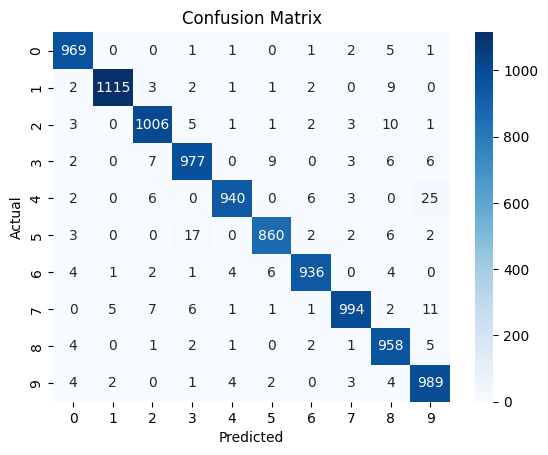

<ipython-input-13-a329d67caf9c>:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, train_loss, 'b-',marker='o',linestyle='-', label='Training Loss')
<ipython-input-13-a329d67caf9c>:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r-',marker='o',linestyle='-', label='Validation Loss')


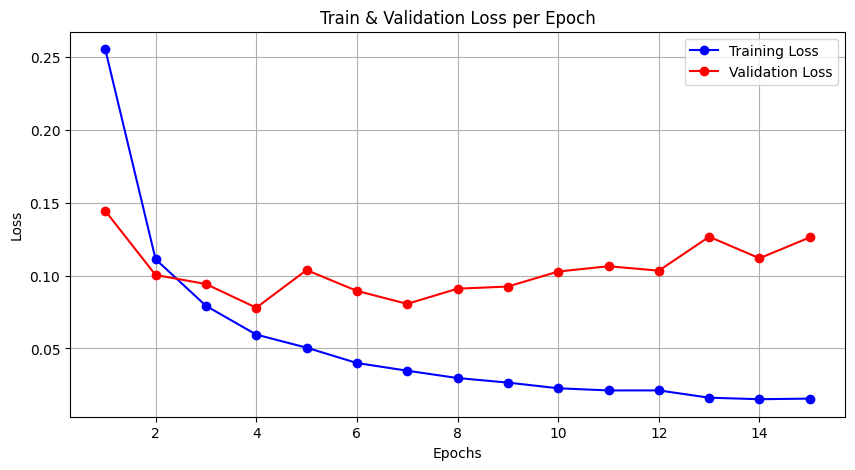


Optimal number of epochs: 4


In [26]:
# Train new models with undersampled classes 3, and 5
model_nn_undersample = get_model_nn()
model_nn_undersample_history = model_nn_undersample.fit(undersample_x_train, undersample_y_train, epochs=15,
                          validation_data=(x_test, y_test))
model_Evaluation(model=model_nn_undersample ,x_test=x_test, y_test=y_test)
show_model_loss(model_nn_undersample_history)

### Explanation of Undersampling - Deals with Less Data: As expected, the accuracy decreased to 0.97. When we have less data to train on, the model performance is affected. The accuracy is still high, so we can conclude that this amount of data is large enough to train the model. Moreover, compared to the previous models, the value of precision for class '5' decreased from 0.9873 to 0.9772 by undersampling the class. This operation is only for exploration and understanding the importance of data scale.

(95373, 28, 28)
(95373,)


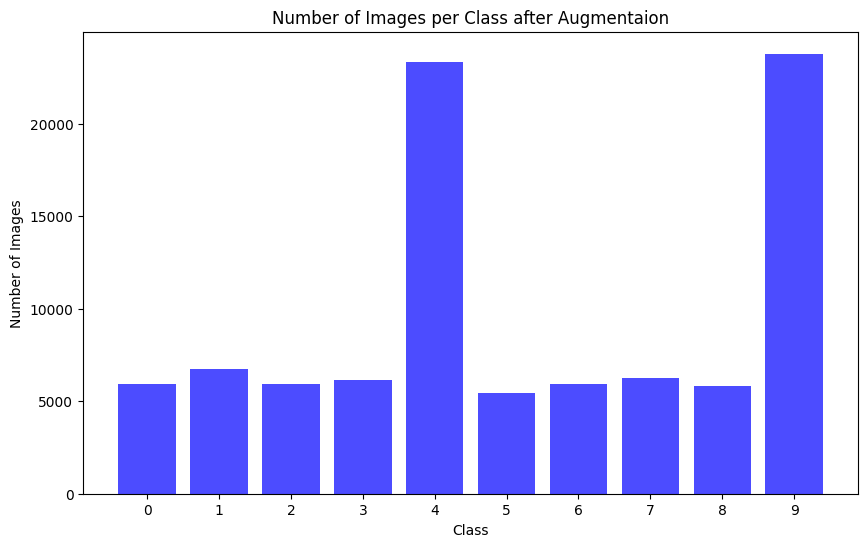

In [12]:
# Augmentaion for classes '4' and '9'

import cv2
import random
from skimage.util import random_noise
from skimage import filters

def augment_image(image):
    # Rotation
    angle = random.randint(-15, 15)
    M = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
    rotated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

    # Flipping
    flipped = cv2.flip(image, 1)  # Horizontal flip

    # Blurring
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    return [rotated, flipped, blurred]

# Original x_train and y_train
x_train_reshaped = x_train.reshape(x_train.shape[0], 28, 28)
#y_train = y_train

# Lists to store augmented data
x_train_augmented = []
y_train_augmented = []

# Augment only classes 4 and 9
for image, label in zip(x_train_reshaped, y_train):
    x_train_augmented.append(image)
    y_train_augmented.append(label)
    if label == 4 or label == 9:
        augmented_images = augment_image(image)
        for aug_image in augmented_images:
            x_train_augmented.append(aug_image)
            y_train_augmented.append(label)

# Convert lists to arrays
x_train_augmented = np.array(x_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# Reshape x_train_augmented to the original shape (num_samples, 28, 28)
x_train_augmented = x_train_augmented.reshape(x_train_augmented.shape[0], 28, 28)

print(x_train_augmented.shape)
print(y_train_augmented.shape)

plot_hist_num_of_classes(y_data_to_plot = y_train_augmented , operation='Augmentaion')

Epoch 1/15
2981/2981 [==============================] - 44s 14ms/step - loss: 0.2159 - accuracy: 0.9340 - val_loss: 0.1157 - val_accuracy: 0.9629
Epoch 2/15
2981/2981 [==============================] - 28s 9ms/step - loss: 0.0965 - accuracy: 0.9704 - val_loss: 0.1014 - val_accuracy: 0.9673
Epoch 3/15
2981/2981 [==============================] - 18s 6ms/step - loss: 0.0703 - accuracy: 0.9777 - val_loss: 0.0889 - val_accuracy: 0.9725
Epoch 4/15
2981/2981 [==============================] - 17s 6ms/step - loss: 0.0550 - accuracy: 0.9827 - val_loss: 0.0757 - val_accuracy: 0.9768
Epoch 5/15
2981/2981 [==============================] - 18s 6ms/step - loss: 0.0461 - accuracy: 0.9849 - val_loss: 0.0772 - val_accuracy: 0.9768
Epoch 6/15
2981/2981 [==============================] - 20s 7ms/step - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0826 - val_accuracy: 0.9783
Epoch 7/15
2981/2981 [==============================] - 18s 6ms/step - loss: 0.0339 - accuracy: 0.9888 - val_loss: 0.0782 - val_a

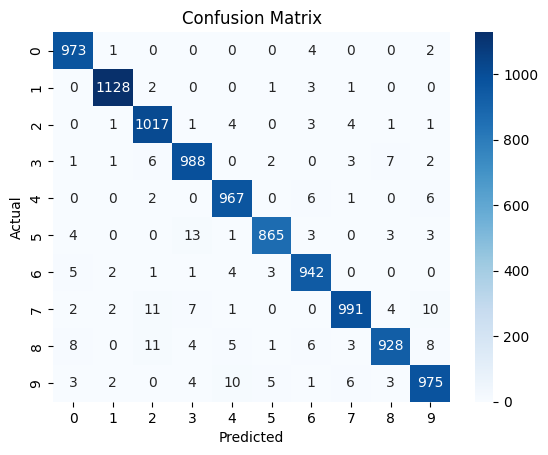

<ipython-input-13-a329d67caf9c>:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, train_loss, 'b-',marker='o',linestyle='-', label='Training Loss')
<ipython-input-13-a329d67caf9c>:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r-',marker='o',linestyle='-', label='Validation Loss')


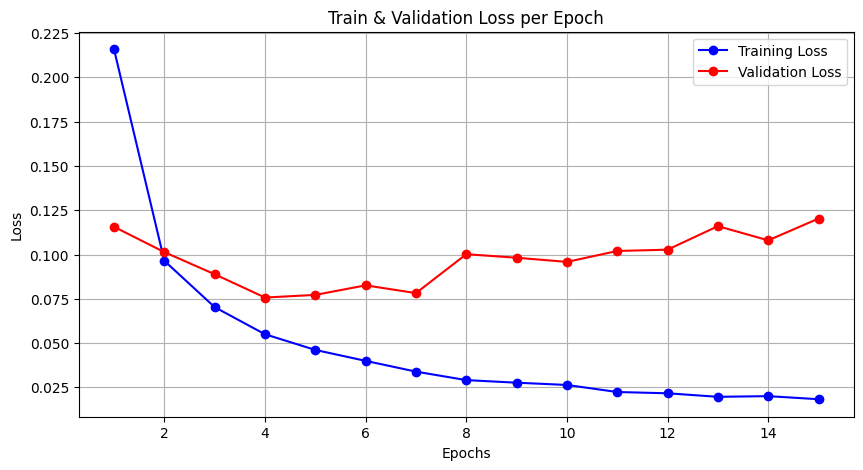


Optimal number of epochs: 4


In [32]:
# Train new models with Augmentaion classes 4, and 9
model_nn_augment = get_model_nn()
model_nn_augment_history = model_nn_augment.fit(x_train_augmented, y_train_augmented, epochs=15,
                          validation_data=(x_test, y_test))
model_Evaluation(model=model_nn_augment ,x_test=x_test, y_test=y_test)
show_model_loss(model_nn_augment_history)

In [13]:
# Comparing the training sets size
unsamp_len = len(undersample_y_train)
aug_len = len(y_train_augmented)
print(f"Unsamples data set have {unsamp_len} images")
print(f"Augmentation data set have {aug_len} images")
print(f"Which is {round((aug_len-unsamp_len)/unsamp_len*100,2)}% more for images in Augmented data set")

Unsamples data set have 54223 images
Augmentation data set have 95373 images
Which is 75.89% more for images in Augmented data set


### We get around the same accuracy for the augmentation and the undersampling datasets and models. Augmentation should increase the accuracy of the model since there is more data to train on, but this also increases the running time. Undersampling, on the other hand, should have decreased the accuracy for the opposite reason and decreased the running time. Also, when I add augmentation as extra data for the training set, I manually create an unbalanced dataset for classes '4' and '9', which also creates a problem as the model is biased towards those classes.

### ***THANK YOU !***

